<a href="https://colab.research.google.com/github/sagashe1/EDA---Google-Playstore-Apps/blob/main/eda_google_apps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('eda-google-apps')
jovian.set_colab_id('1E2hPHhhJo-SZrfLGMNbPPE-h5FLjFM0K')

![](https://i.imgur.com/r81eTyb.png)
# PROJECT - EDA-GOOGLE PLAYSTORE APPS

Exploratory Data Analysis (EDA) is used to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods. It helps determine how best to manipulate data sources to get the answers you need, making it easier to discover patterns, spot anomalies, test a hypothesis, or check assumptions.

EDA requires knowledge of statistics, visualization techniques and data-analysis tools like numpy, pandas, seaborn, plotly, matplotlib.

In this project, we will explore the applications available on Google playstore.

## __Introduction:__

In this project we will explore 2.3 Million+ App Data available on Google Playstore . From this analysis, we will learn which is the most popular app in different catergories along with other insights. 

We will explore the relationships between various parameters using graphs like barplot, scatter plot, etc. 

## __Steps to follow:__
1. Downloading the dataset & install all required libraries
2. Explore & clean the data.
3. Visualization 
4. Summarize & conclude 
5. Future Work.
6. References.

In [154]:
#Lets save our work on Jovian first:
!pip install jovian --upgrade --quiet
import jovian
# Execute this to save new versions of the notebook
jovian.commit(project="eda-google-apps")

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/shwetsagashe/eda-google-apps


'https://jovian.ai/shwetsagashe/eda-google-apps'

### __1. DOWNLOAD THE DATASET & INSTALL ALL THE REQUIRED LIBRARIES:__

We will download the Google playstore App data from Kaggle using "Opendatasets" library. But first lets install all the required libraries

In [68]:
# !pip uninstall matplotlib

Found existing installation: matplotlib 3.5.3
Uninstalling matplotlib-3.5.3:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.3-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.3.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.5.3


In [3]:
!pip install opendatasets --upgrade --quiet
!pip install  matplotlib==3.4.2 seaborn --quiet
!pip install plotly --quiet
!pip install -U matplotlib --quiet
!pip install folium --quiet

In [153]:
import opendatasets as od
import os
import pandas as pd
import numpy as np
import random
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
pio.renderers.default = 'colab'
%matplotlib inline
import plotly 
import matplotlib
import folium
from matplotlib.pyplot import figure

In [8]:
link = 'https://www.kaggle.com/datasets/gauthamp10/google-playstore-apps'
od.download(link)

Skipping, found downloaded files in "./google-playstore-apps" (use force=True to force download)


Let's view the files downloaded.

In [9]:
os.listdir('./google-playstore-apps')

['Google-Playstore.csv']

Let's check out both the csv files by downloading them to a dataframe.

In [10]:
df=pd.read_csv('./google-playstore-apps'+'/Google-Playstore.csv')


In [11]:
pd.set_option('display.max_columns', None) # to display all the columns of the dataframe
df.head(2)

App Name                      App Id   Category  Rating  \
0              Gakondo         com.ishakwe.gakondo  Adventure     0.0   
1  Ampere Battery Info  com.webserveis.batteryinfo      Tools     4.4   

   Rating Count Installs  Minimum Installs  Maximum Installs  Free  Price  \
0           0.0      10+              10.0                15  True    0.0   
1          64.0   5,000+            5000.0              7662  True    0.0   

  Currency  Size Minimum Android                       Developer Id  \
0      USD   10M      7.1 and up  Jean Confident Irénée NIYIZIBYOSE   
1      USD  2.9M      5.0 and up                         Webserveis   

                 Developer Website         Developer Email      Released  \
0      https://beniyizibyose.tk/#/  jean21101999@gmail.com  Feb 26, 2020   
1  https://webserveis.netlify.app/    webserveis@gmail.com  May 21, 2020   

   Last Updated Content Rating  \
0  Feb 26, 2020       Everyone   
1  May 06, 2021       Everyone   

                                      Privacy Policy  Ad Supported  \
0                 https://beniyizibyose.tk/projects/         False   
1  https://dev4phones.wordpress.com/licencia-de-uso/          True   

   In App Purchases  Editors Choice         Scraped Time  
0             False           False  2021-06-15 20:19:35  
1             False           False  2021-06-15 20:19:35

### __2. EXPLORE & CLEAN THE DATA:__ 
Now we will explore the data we just extracted & clean the data whereever required. 

In [12]:
df.info(null_counts=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  """Entry point for launching an IPython kernel.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   App Name           2312942 non-null  object 
 1   App Id             2312944 non-null  object 
 2   Category           2312944 non-null  object 
 3   Rating             2290061 non-null  float64
 4   Rating Count       2290061 non-null  float64
 5   Installs           2312837 non-null  object 
 6   Minimum Installs   2312837 non-null  float64
 7   Maximum Installs   2312944 non-null  int64  
 8   Free               2312944 non-null  bool   
 9   Price              2312944 non-null  float64
 10  Currency           2312809 non-null  object 
 11  Size               2312748 non-null  object 
 12  Minimum Android    2306414 non-null  object 
 13  Developer Id       2312911 non-null  object 
 14  Developer Website  1552109 non-null  object 
 15  Developer Email    2312913 non-n

In [13]:
df.isna().sum()

App Name                  2
App Id                    0
Category                  0
Rating                22883
Rating Count          22883
Installs                107
Minimum Installs        107
Maximum Installs          0
Free                      0
Price                     0
Currency                135
Size                    196
Minimum Android        6530
Developer Id             33
Developer Website    760835
Developer Email          31
Released              71053
Last Updated              0
Content Rating            0
Privacy Policy       420953
Ad Supported              0
In App Purchases          0
Editors Choice            0
Scraped Time              0
dtype: int64

We can see that most of the significant columns are non-null except few. We will delete the Null rows in these columns. 

In [14]:
df = df.dropna(axis=0, subset= ['App Name','Size'])

Let us check out the specifics of the numerical columns.

In [15]:
df.describe()

Rating  Rating Count  Minimum Installs  Maximum Installs  \
count  2.290059e+06  2.290059e+06      2.312640e+06      2.312746e+06   
mean   2.203151e+00  2.864841e+03      1.834604e+05      3.202283e+05   
std    2.106223e+00  2.121627e+05      1.513208e+07      2.355596e+07   
min    0.000000e+00  0.000000e+00      0.000000e+00      0.000000e+00   
25%    0.000000e+00  0.000000e+00      5.000000e+01      8.400000e+01   
50%    2.900000e+00  6.000000e+00      5.000000e+02      6.950000e+02   
75%    4.300000e+00  4.200000e+01      5.000000e+03      7.354750e+03   
max    5.000000e+00  1.385576e+08      1.000000e+10      1.205763e+10   

              Price  
count  2.312746e+06  
mean   1.035069e-01  
std    2.633239e+00  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    0.000000e+00  
max    4.000000e+02

Let us convert the 'Released','Last Updated' & 'Scraped Time' columns to datetime format.

In [79]:
df['Released'] = df['Released'].apply(pd.to_datetime)

In [ ]:
df[['Released']] = df[['Released','Last Updated', 'Scraped Time']].apply(pd.to_datetime)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2312746 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype         
---  ------             -----         
 0   App Name           object        
 1   App Id             object        
 2   Category           object        
 3   Rating             float64       
 4   Rating Count       float64       
 5   Installs           object        
 6   Minimum Installs   float64       
 7   Maximum Installs   int64         
 8   Free               bool          
 9   Price              float64       
 10  Currency           object        
 11  Size               object        
 12  Minimum Android    object        
 13  Developer Id       object        
 14  Developer Website  object        
 15  Developer Email    object        
 16  Released           datetime64[ns]
 17  Last Updated       object        
 18  Content Rating     object        
 19  Privacy Policy     object        
 20  Ad Supported       bool 

Looks like the data is clean. 

### __3. VISUALIZATION:__
Let us try to establish relation between the columns of the dataframe by creating various graphs. As out data is huge, we will work on a sample.

In [84]:
df_sample =df.sample(frac=0.20,random_state=5).reset_index()

#### __3.1 Most Popular Category:__
Lets explore which categories of apps are most popular. 

In [127]:
pop_cat= df_sample.groupby([df_sample['Category']])['Maximum Installs'].sum().to_frame().sort_values('Maximum Installs',ascending=False).head(15)

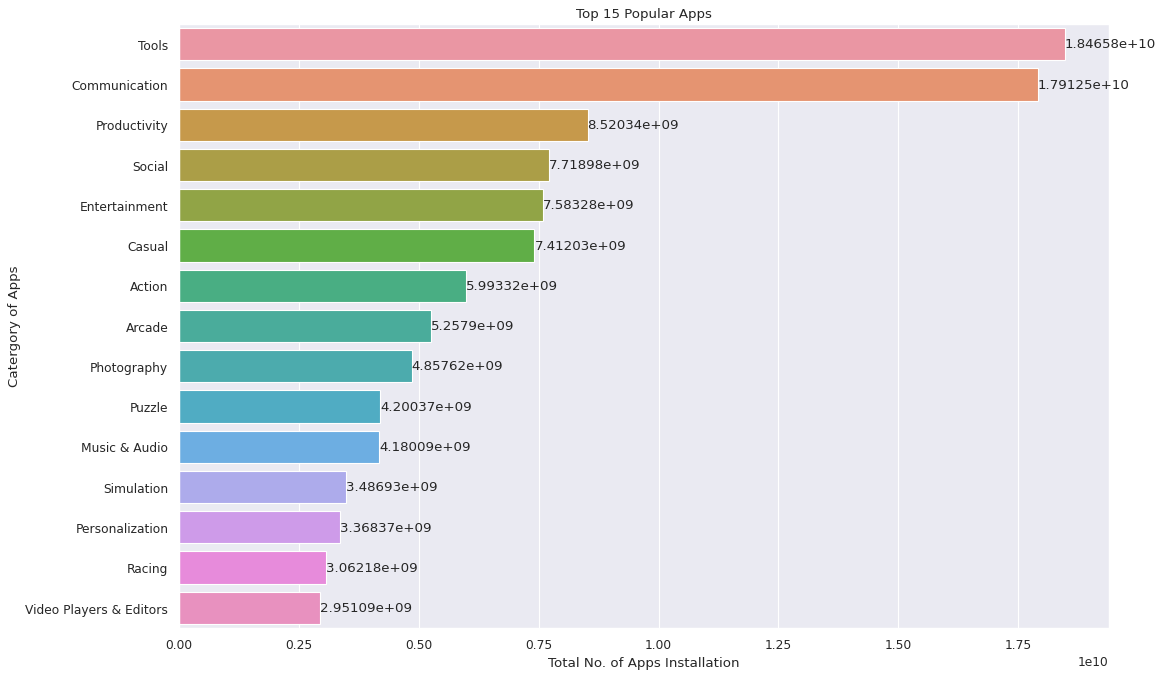

In [128]:
figure(figsize=(15, 10), dpi=80)
sns.set(style='darkgrid')
ax= sns.barplot(data = pop_cat ,y=pop_cat.index,x='Maximum Installs')
ax.set(xlabel='Total No. of Apps Installation', ylabel='Catergory of Apps')
ax.set_title("Top 15 Popular Apps")
ax.bar_label(ax.containers[0])
plt.show()

We can see the most popular Category is 'Tools'. 

#### __3.2 Categories with Highest Ratings:__
Lets explore which categories of apps have highest ratings. 

In [52]:
avg_rating = df.groupby('Category').Rating.mean().sort_values(ascending=False).head(10).index.values
avg_rating

array(['Role Playing', 'Casino', 'Simulation', 'Weather', 'Card',
       'Racing', 'Video Players & Editors', 'Word', 'Strategy', 'Comics'],
      dtype=object)

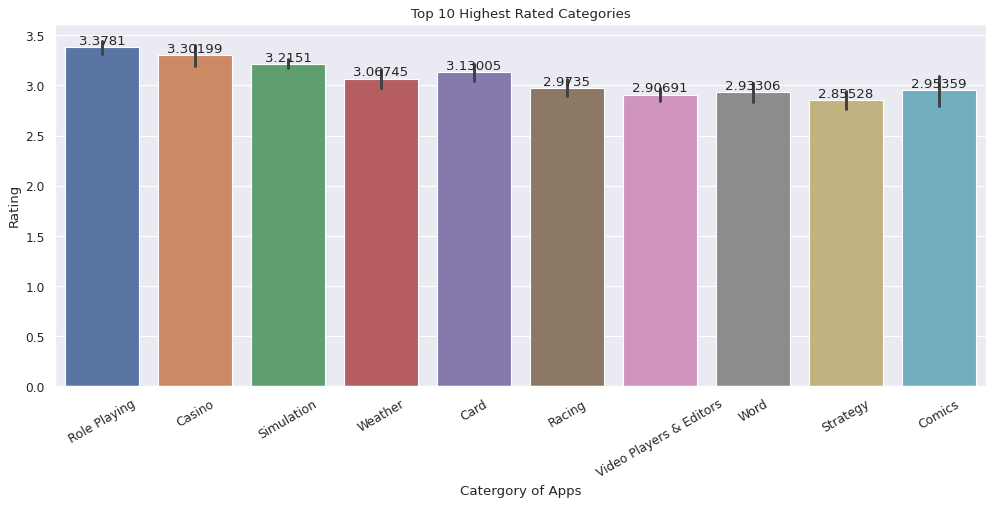

In [71]:
figure(figsize=(15, 6), dpi=80)
ax= sns.barplot(data = df_sample,x='Category',y='Rating',order=avg_rating)
ax.set(ylabel='Rating', xlabel='Catergory of Apps')
ax.set_title("Top 10 Highest Rated Categories")
plt.bar_label(ax.containers[0]) # plot bar labels
plt.xticks(rotation=30)
plt.show()

We can see that "Role Playing" Category has highest Avg rating of 3.37 followed by 'Casino'. 

#### __3.3 Year-Wise App Installation :__
Lets explore year wise distribution of app installed.  

In [134]:
fig = px.scatter(df_sample, x=df_sample.Released.dt.year, y ='Maximum Installs',color='Category',
                 size = 'Maximum Installs',
                 title = "Year Wise App Installation",
                 )
fig.update_layout(xaxis_title ='Year of Release', 
                  yaxis_title ='No. of Installations',
                  )
fig.show()

We can see that "Communication" Category has highest no. of Insatllation in Year -2014. However with respect to the total Installation of apps over the period of years, "Tools" Category is most popular as we saw in the first graph.

#### __3.4 Most Popular App :__
Lets explore which app is the most popular.  

In [135]:
df_sample.head(2)

index                     App Name                               App Id  \
0  1568698  Fast Money - Reliable Loans            com.fastmoney.money.loans   
1   417757            Erlang Calculator  com.besaba.anvarov.erlangcalculator   

  Category  Rating  Rating Count Installs  Minimum Installs  Maximum Installs  \
0  Finance     0.0           0.0       5+               5.0                 6   
1    Tools     4.0          10.0   1,000+            1000.0              3219   

   Free  Price Currency  Size Minimum Android Developer Id  \
0  True    0.0      USD  5.6M      4.4 and up    Easy Devs   
1  True    0.0      USD  2.1M      4.0 and up  Orenburg RA   

           Developer Website       Developer Email   Released  Last Updated  \
0                        NaN  easylabs36@gmail.com 2021-06-02  Jun 09, 2021   
1  http://anvarov.besaba.com             ra7@bk.ru 2016-01-30  May 14, 2018   

  Content Rating                                     Privacy Policy  \
0       Everyone  https://firebasestorage.googleapis.com/v0/b/fa...   
1       Everyone                                                NaN   

   Ad Supported  In App Purchases  Editors Choice         Scraped Time  
0          True             False           False  2021-06-16 02:21:53  
1          True             False           False  2021-06-16 03:21:22

In [150]:
pop_app = df[['App Name','Maximum Installs']].sort_values('Maximum Installs',ascending=False).head(10)
pop_app

App Name  Maximum Installs
2155096              Google Play services       12057627016
881403                            YouTube        9766230924
1773294                            Google        9154248491
1733042  Google Maps - Navigate & Explore        9141671889
1060335             Google Text-to-Speech        9034404884
944254       Google Chrome: Fast & Secure        8925640788
2099458                             Gmail        8756574289
2011395       Android Accessibility Suite        7408134567
893676                       Google Drive        7028265259
2222701                          Facebook        6782619635

In [152]:
fig = px.bar(pop_app,
             x = 'Maximum Installs',
             y = 'App Name',
             title = 'Top 10 Most Installed Apps',
             )
fig.update_layout(xaxis_title = 'No. of Installations',
                  yaxis_title ='Name of the App',
                  )
fig.show()